# LAVA* | Algorithmic Voyages Through the Afterlife's Maze
....

## How we find the 'ShortBest' path?
(list with the 4 algorithms)


### Our Hypothesis: A* finds always the 'ShortBest' path!

Let's see, if this is true ...

### Customize the Environment

We've developed a custom environment using the **Minihack level editor** to gain precise control over our work. The environment we're working on is a 15x15 **fully observable maze**, where the agent navigates through the grid while avoiding hazardous **lava pools**.

The agent starts in the *top left corner* and needs to find the stairs in the *bottom right corner* while avoiding lava pools. 

Inside *env_levels.py* there is the *'.des-file'*:

* Agent: '@'
* Target: '>'
* Floor tile: '.'
* Walls: '-' and '|'
* Lava pools: 'L'

> As part of our exploration, we're committed to introducing and navigating through **various levels of complexity**. This initiative allows us to test and implement different search algorithms tailored to the evolving challenges presented by each level. This dynamic approach not only showcases the adaptability of our agent but also facilitates a comprehensive evaluation of its problem-solving capabilities across diverse scenarios.

For now, we: 
* initialize the specific map configuration
* set a random seed for reproducibility
* reset the environment to get the initial observation
* render the environment for visual representation

### Levels
(complexity of the levels)

## A GridWorld Problem

To streamline the implementation of search algorithms in our agent, we've established a problem definition encapsulated within a class. Specifically, we've conceptualized our problem using a **GridWorldProblem class**. This class serves as a foundation for formulating the problem in a way that aligns with the principles of graph search algorithms.

As these search algorithms operate on graphs, we visualize the **corresponding graph of the agent's environment**. This graph effectively represents the navigable nodes within the maze, and we highlight the coordinates of each node for clarity. The edges connecting these states within the graph are assigned a uniform cost of 1.

In our case we will consider the _chars_ representation, a multi-dimensional array containing the ASCII encoding of the characters. More specifically:

* Agent: ASCII 64
* Stairs: ASCII 62
* Walls: ASCII
* Lava: ASCII 125

> To ensure an accurate and meaningful representation of the maze environment within the graph, we undertake a crucial **preprocessing step**. This step involves meticulous manipulation of the Minihack matrix, allowing us to narrow our focus exclusively to the observable aspects of the environment.

In [1]:
#!pip install pandas

In [2]:
# Importations
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import pandas as pd

from algorithms import *
from classes import *
from utils import *
from env_levels import *
from IPython.display import Image
import IPython.display as display
%matplotlib inline



### Instantiate the variables for the comparison tables
.... (in order to collect the results we ....)

In [3]:
comparison_level1 = []
comparison_level2 = []
comparison_level3 = []
comparison_level4 = []
algorithms = ['Breadth First Search (UA)', 'Uniform Cost Search (UA)', 'A* (IA)', 'Greedy Best First Search (IA)']
time_level1 = []
path_level1 = []
path_cost_level1 = []
time_level2 = []
path_level2 = []
path_cost_level2 = []
time_level3 = []
path_level3 = []
path_cost_level3 = []
time_level4 = []
path_level4 = []
path_cost_level4 = []

# <u> LEVEL 1 </u>

In [4]:
# Creating the environment
env_lv1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv1.seed(42)
obs_lv1 = env_lv1.reset()
env_lv1.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}.........|                                                                 
|.....}.....}.|                                                                 
|}............|                                                                 
|.}.......}...|                                                                 
|...}}..}.....|                                                                 
|.}.........}.|                                                                 
|....}..}.....|                                                                 
|.}........}.}|            

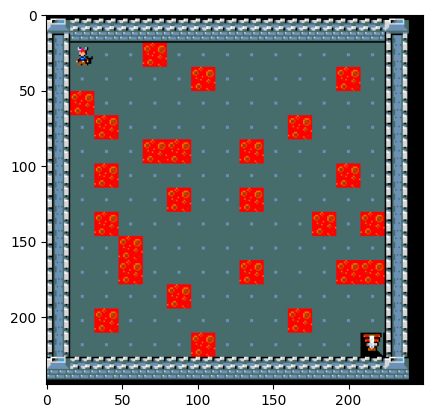

In [5]:
# Instantiate the game map
game = obs_lv1['pixel']

# Plotting the environment directly from minihack generator
plt.imshow(game[45:290, 0:250]) 

In [6]:
# Process character and color matrices from obs_lv1
game_map_lv1 = process_matrix(obs_lv1['chars'])
process_matrix(obs_lv1['colors']) # 6 is blue, 1 is red
game_map_lv1_colors = process_matrix(obs_lv1['colors'])

# Instantiate the GridWorldProblem
grid_problem1 = GridWorldProblem(game_map_lv1, find_state_coord(game_map_lv1, ord('@')), find_state_coord(game_map_lv1, ord('>')), game_map_lv1_colors)

print("Initial state:", grid_problem1.initial_state)
print("Goal state:", grid_problem1.goal_state)

# Create basic graph
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)

# Plot the basic graph
plot_graph(basic_graph, "plots/case1/case1.png")

Initial state: (1, 1)
Goal state: (13, 13)


## Uninformed Agent 

In [7]:
# Instantiate an Uninformed Search Agent for level 1
uninformed_agent = UninformedSearchAgent(grid_problem1) 

### Breadth-First-Search

Our uninformed agent employs the Breadth-First Search (BFS) algorithm to navigate through the grid world problem.

* Red Nodes: Lava pools.
* Green Nodes: Nodes visited by the agent
* Blue Node: Initial position of the agent

> This visualization provides a clear depiction of the agent's exploration process, distinguishing between hazardous areas (lava pools), traversed paths, and the starting point of the agent. The Breadth-First Search algorithm ensures a systematic exploration of the grid, contributing to efficient pathfinding in our maze-like environment.

In [8]:
# Perform uniformed search with the Breadth-First Search
solution_path = uninformed_agent.search(breadth_first_search) 

# Record the execution time and the solution path (for the comparison)
time_level1.append(uninformed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph(explored_graph, "plots/case1/breadth_first_search.png") 

Time: 0.009726 seconds
The found path is long 29.
The cost of the taken path is 29.


### Uniform Cost Search
Now we are changing the algorithm. We are using the Uniform Cost Search, which takes the g(n) cost into account. The g(n) is the cost from the initial state to the current node n.

In [9]:
# Use the Uniform Cost Search
uninformed_agent = UninformedSearchAgent(grid_problem1)
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

# Record the results
time_level1.append(uninformed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The taken path has the length {len(solution_path)} (steps).')

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/uniform_cost.png")

Time: 0.014542 seconds
The taken path has the length 13 (steps).
The cost of the taken path is 13.


## Informed Agent 

In [10]:
# Instantiate an Informed Search Agent
informed_agent = InformedSearchAgent(grid_problem1)

### A*

In [11]:
# Use A* 
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

# Record the results
time_level1.append(informed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/astar_search.png")

Time: 0.00166 seconds
The found path is long 13
The cost of the taken path is 13.


### Greedy Best First Search

In [12]:
# Use Greedy Best First Search
informed_agent = InformedSearchAgent(grid_problem1)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

# Record the results
time_level1.append(informed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/greedy_best_first_search.png")

Time: 0.001004 seconds
The found path is long 13
The cost of the taken path is 13.


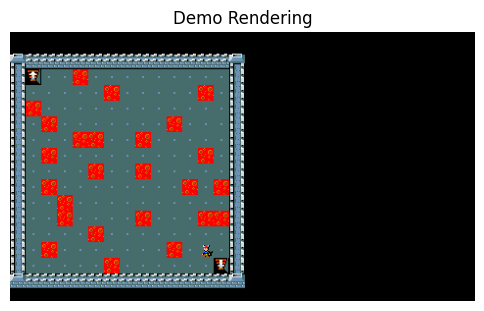

In [13]:
###### put it somewhere else to show somethinh
# PLOT
actions = actions_from_path(find_state_coord(game_map_lv1, ord('@')), solution_path)

# Create a new figure without plotting anything
plt.figure(figsize=(6, 6))
plt.axis('off')  # Turn off axis ticks and labels
plt.title('Demo Rendering')

image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env_lv1.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])
    time.sleep(0.3)

## LEVEL 1: Performance Evaluation and Comparison of Search Algorithms
...... (short explanation)

In [14]:
comparison_level1.append(algorithms)
comparison_level1.append(time_level1)
comparison_level1.append(path_level1)
comparison_level1.append(path_cost_level1)
df_level1 = pd.DataFrame()
df_level1['Algorithm'] = algorithms
df_level1['Execution Time'] = time_level1
df_level1['Path Length'] = path_level1
df_level1['Path Cost'] = path_cost_level1
df_level1.set_index('Algorithm', inplace=True)
df_level1

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.009726           29         29
Uniform Cost Search (UA)             0.014542           13         13
A* (IA)                              0.001660           13         13
Greedy Best First Search (IA)        0.001004           13         13

In [15]:
#Image(filename='plots/case1/case1.png', width=500, height=500)

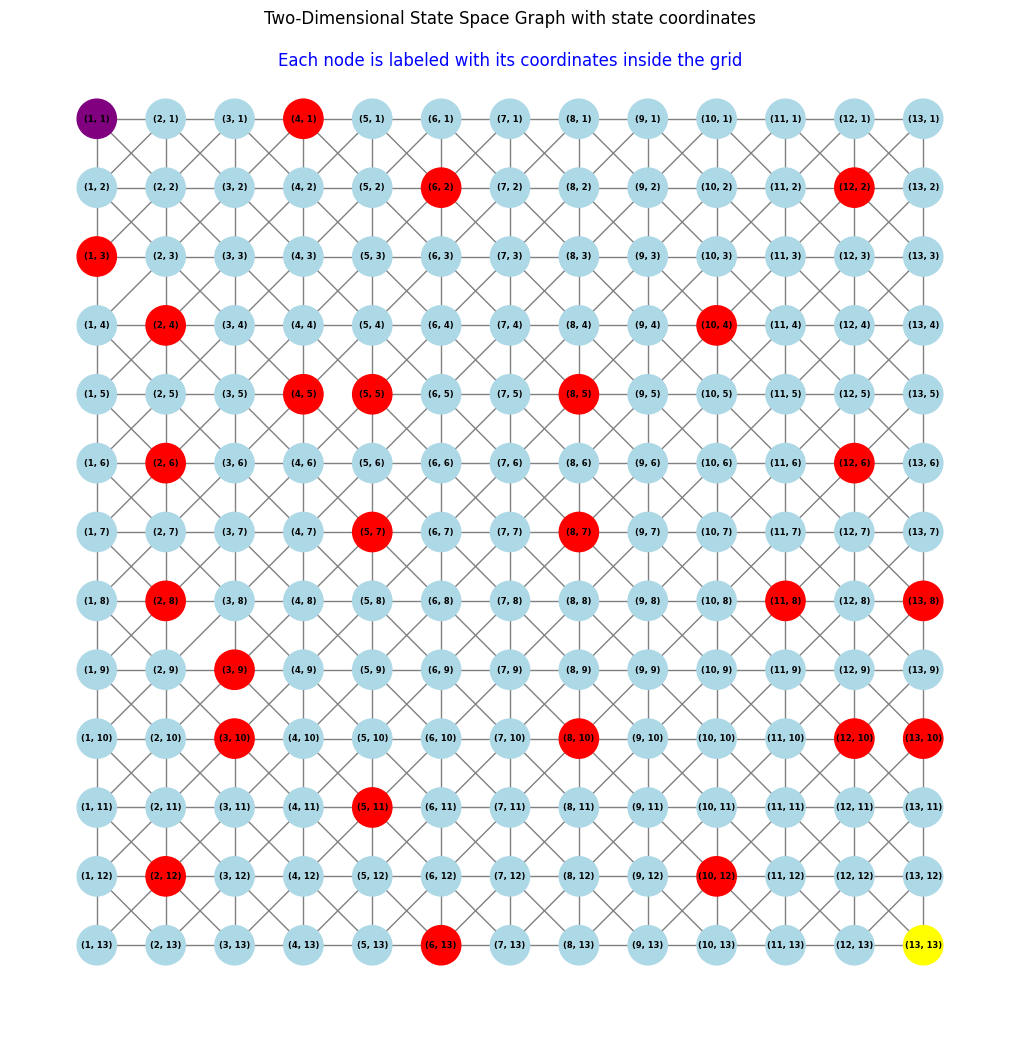

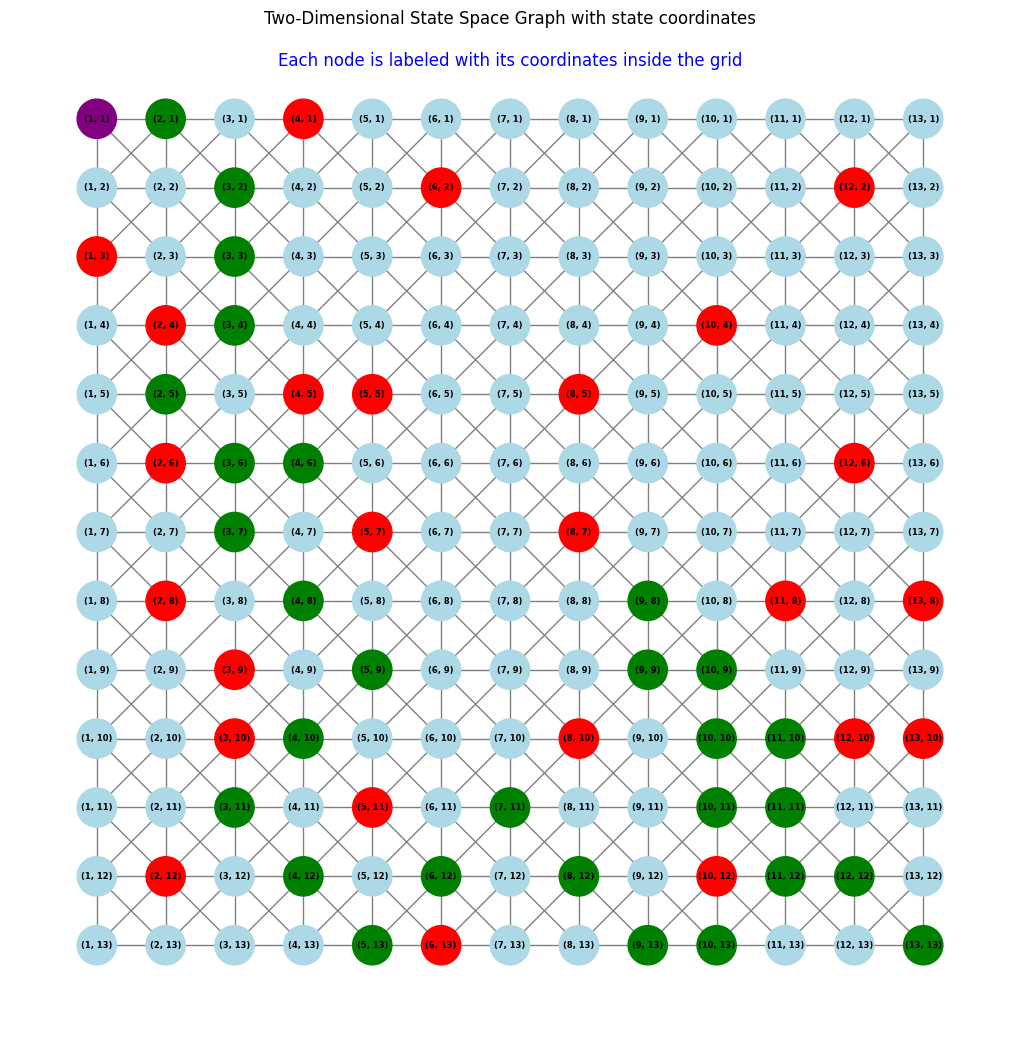

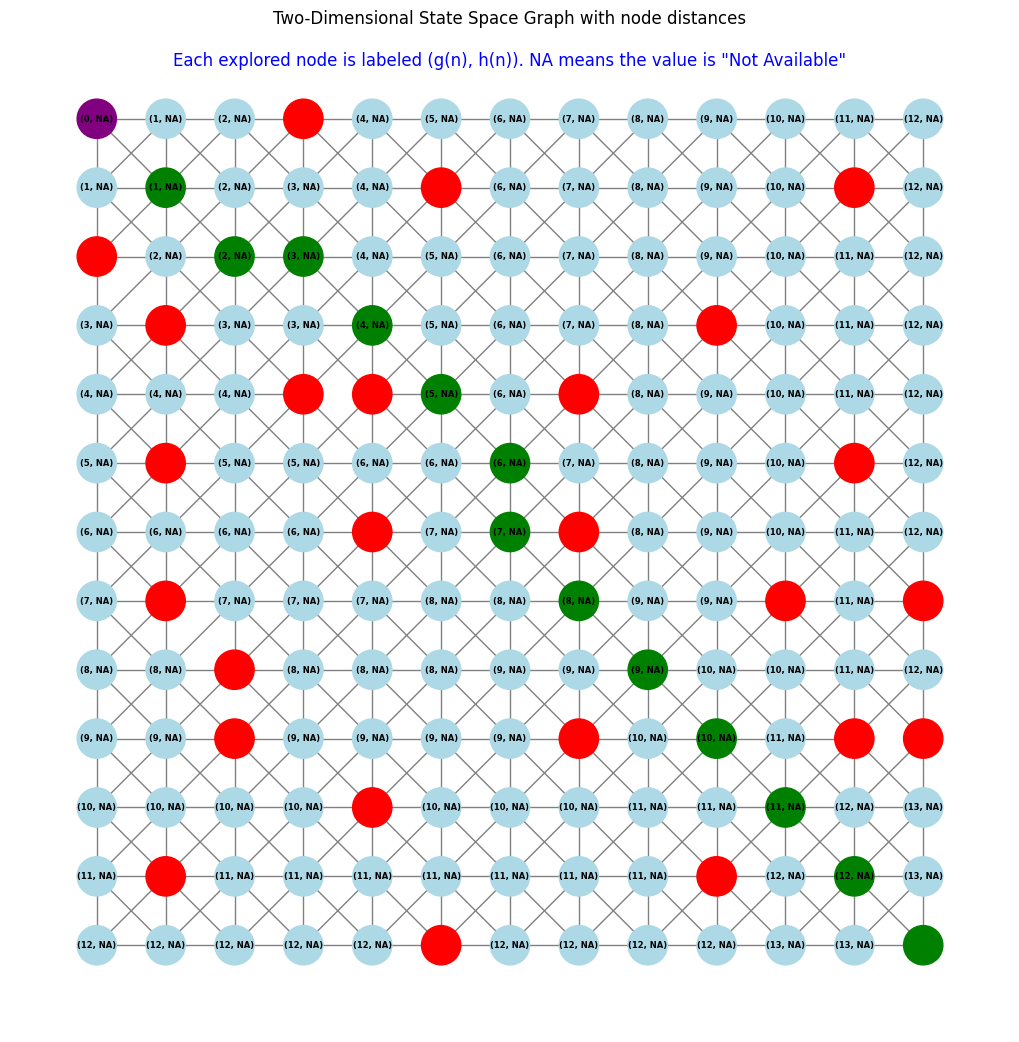

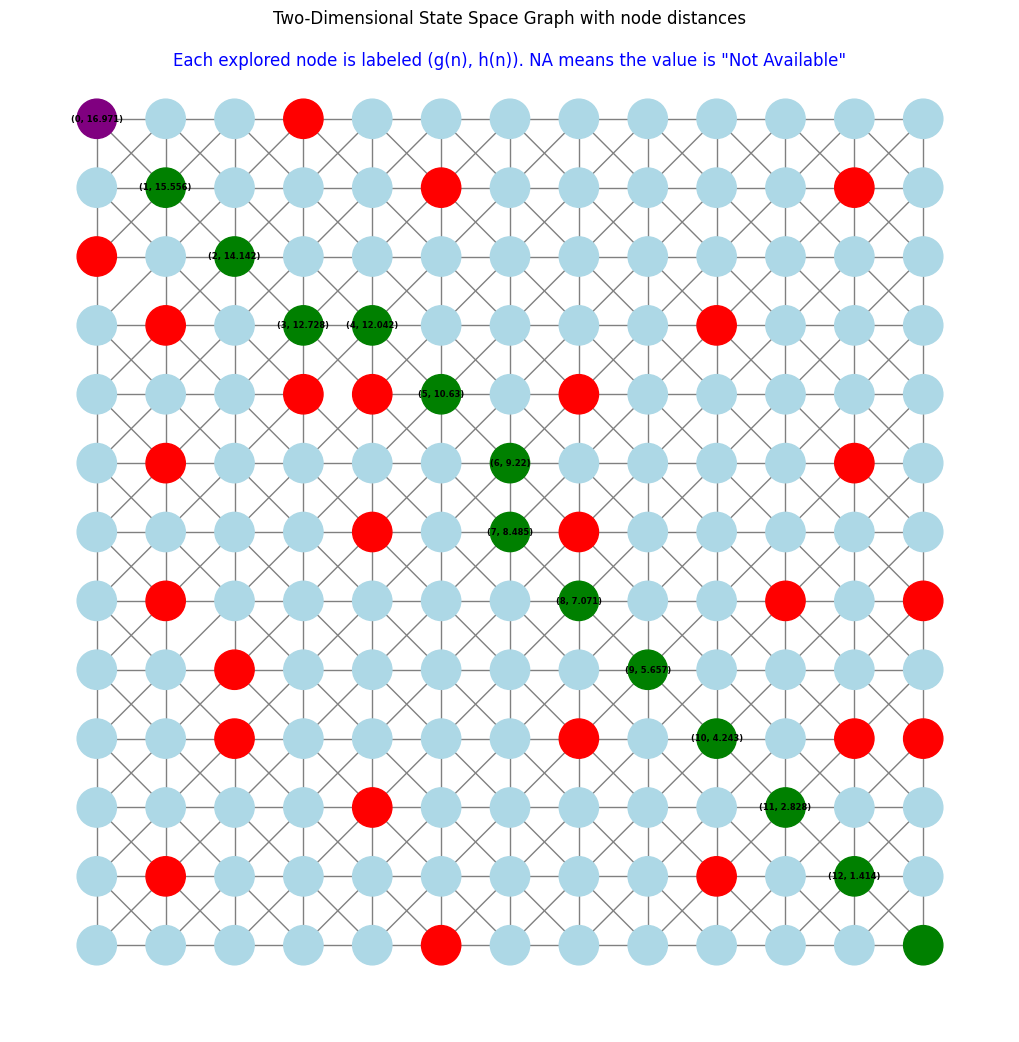

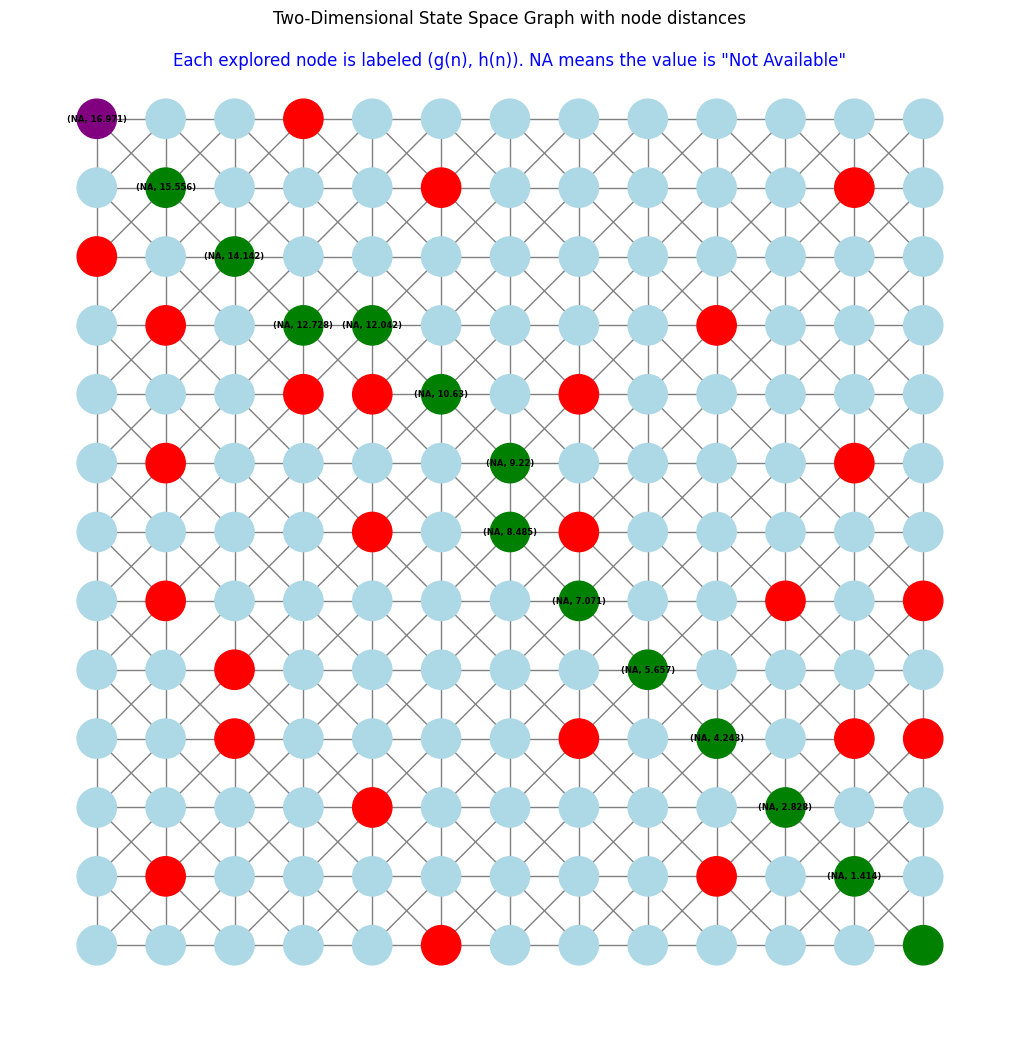

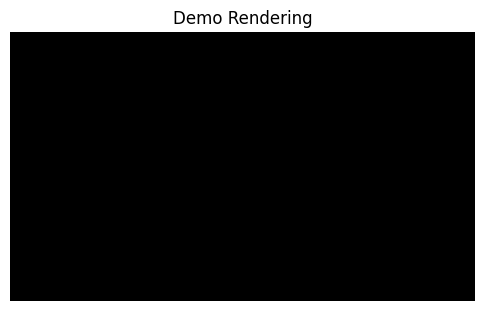

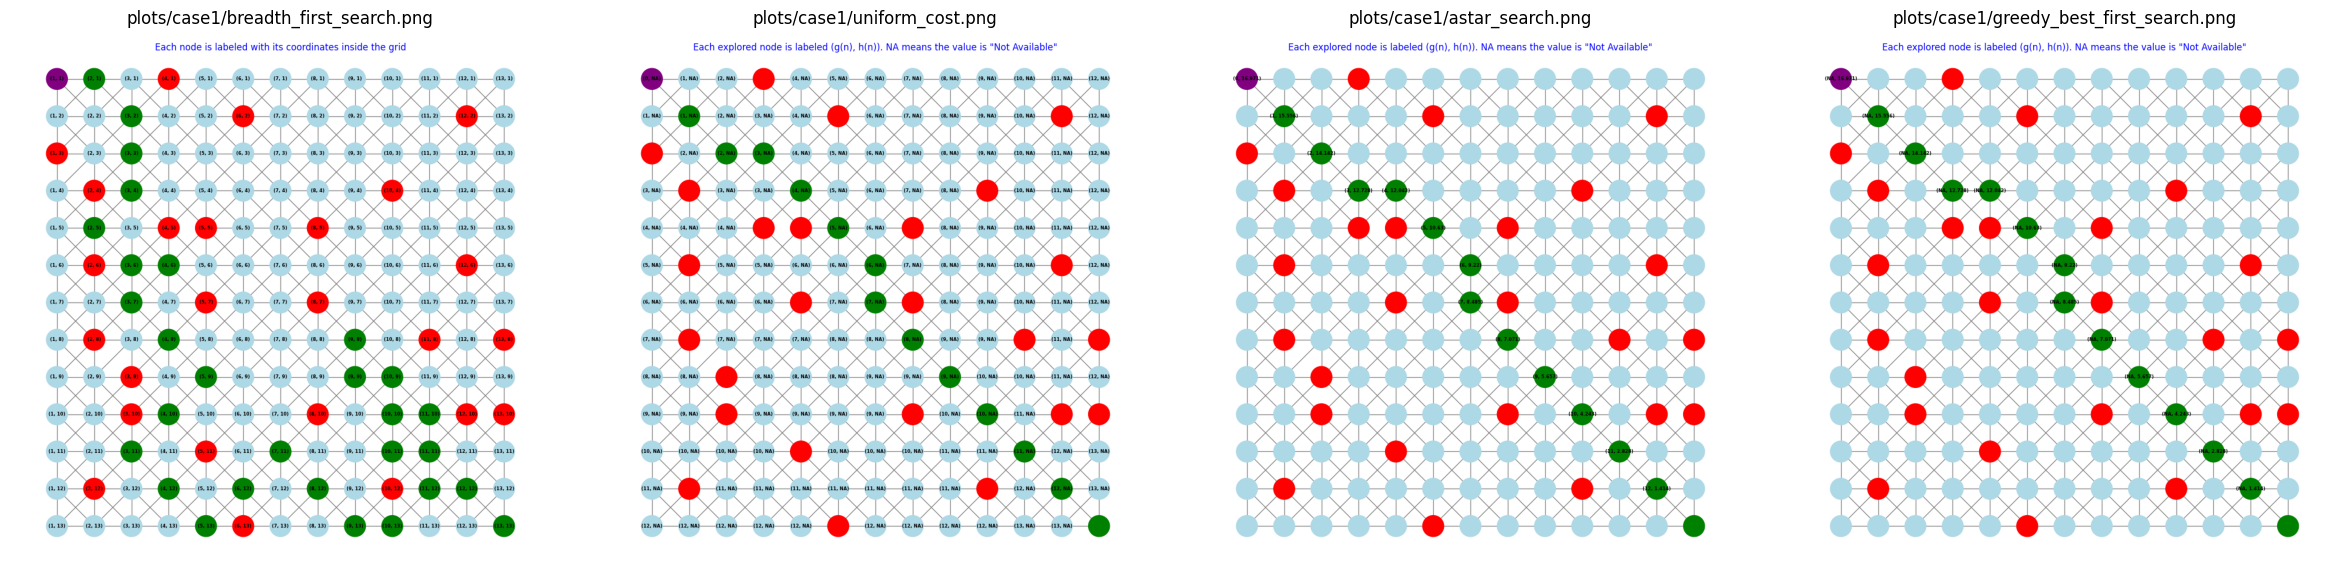

In [16]:
%matplotlib inline

plot_paths_level1 = ['plots/case1/breadth_first_search.png',
                    'plots/case1/uniform_cost.png',
                    'plots/case1/astar_search.png',
                    'plots/case1/greedy_best_first_search.png']

display_saved_plots(plot_paths_level1)

### Results and Findings
....

## <u> LEVEL 2 </u>
To increase the complexity of the environment and to test, how the algorithms work, we add more lava pools.

In [17]:
# Creating the environment
env_lv2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv2.seed(42)
obs_lv2 = env_lv2.reset() 
env_lv2.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

In [18]:
# Game map
plt.imshow(obs_lv2['pixel'][45:290, 0:250]) 
game_map_lv2 = process_matrix(obs_lv2['chars'])
game_map_lv2_colors = process_matrix(obs_lv2['colors'])

In [19]:
# Instantiate GridWorldProblem for new environment
grid_problem2 = GridWorldProblem(game_map_lv2, find_state_coord(game_map_lv2, ord('@')), find_state_coord(game_map_lv2, ord('>')), game_map_lv2_colors)

print("Initial state:", grid_problem2.initial_state)
print("Goal state:", grid_problem2.goal_state)

basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)

plot_graph(basic_graph, "plots/case2/case2.png")

Initial state: (1, 1)
Goal state: (13, 13)


## Uninformed Agent 

In [20]:
# Instantiate an Uninformed Search Agent for level 2
uninformed_agent = UninformedSearchAgent(grid_problem2) 

### Breadth-First-Search

In [21]:
# Perform uniformed search with the Breadth-First Search
solution_path = uninformed_agent.search(breadth_first_search)

# Record the results
time_level2.append(uninformed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph(explored_graph, "plots/case2/breadth_first_search.png") # Plot the graph with both basic and explored nodes

Time: 0.007107 seconds
The found path is long 28.
The cost of the taken path is 28.


### Uniform Cost Search

In [22]:
# Use the Uniform Cost Search
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

# Record the results
time_level2.append(uninformed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph_distances(explored_graph, node_distances, "plots/case2/uniform_cost.png")

Time: 0.01101 seconds
The found path is long 14.
The cost of the taken path is 14.


## Informed Agent

In [23]:
# Instantiate an Informed Search Agent
informed_agent = InformedSearchAgent(grid_problem2)

### A*

In [24]:
# Use A* 
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

# Record the results
time_level2.append(informed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph
plot_graph_distances(explored_graph, node_distances, "plots/case2/astar_search.png")

Time: 0.002417 seconds
The found path is long 14
The cost of the taken path is 14.


### Greedy Best-First Search

In [25]:
# Use Greedy Best First Search
informed_agent = InformedSearchAgent(grid_problem2)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

# Record the results
time_level2.append(informed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case2/greedy_best_first_search.png")

Time: 0.003249 seconds
The found path is long 14
The cost of the taken path is 14.


In [26]:
comparison_level2.append(algorithms)
comparison_level2.append(time_level2)
comparison_level2.append(path_level2)
comparison_level2.append(path_cost_level2)
df_level2 = pd.DataFrame()
df_level2['Algorithm'] = algorithms
df_level2['Execution Time'] = time_level2
df_level2['Path Length'] = path_level2
df_level2['Path Cost'] = path_cost_level2
df_level2.set_index('Algorithm', inplace=True)
df_level2

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.007107           28         28
Uniform Cost Search (UA)             0.011010           14         14
A* (IA)                              0.002417           14         14
Greedy Best First Search (IA)        0.003249           14         14

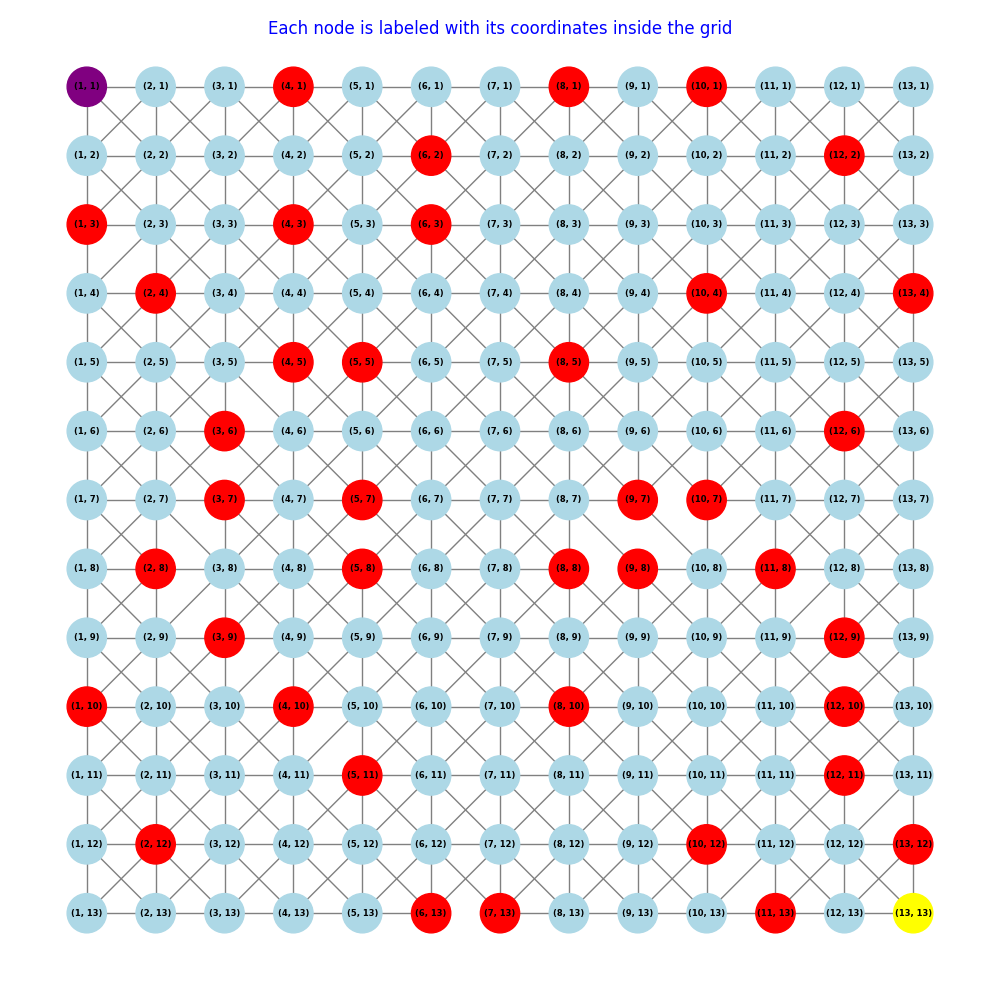

In [27]:
Image(filename='plots/case2/case2.png', width=500, height=500)

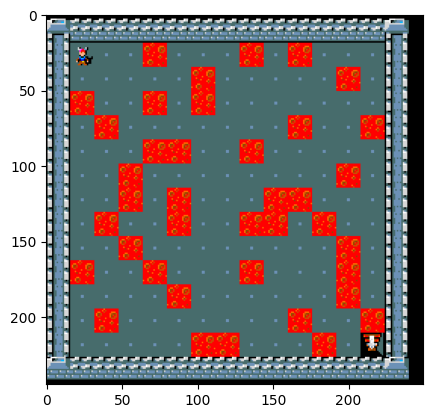

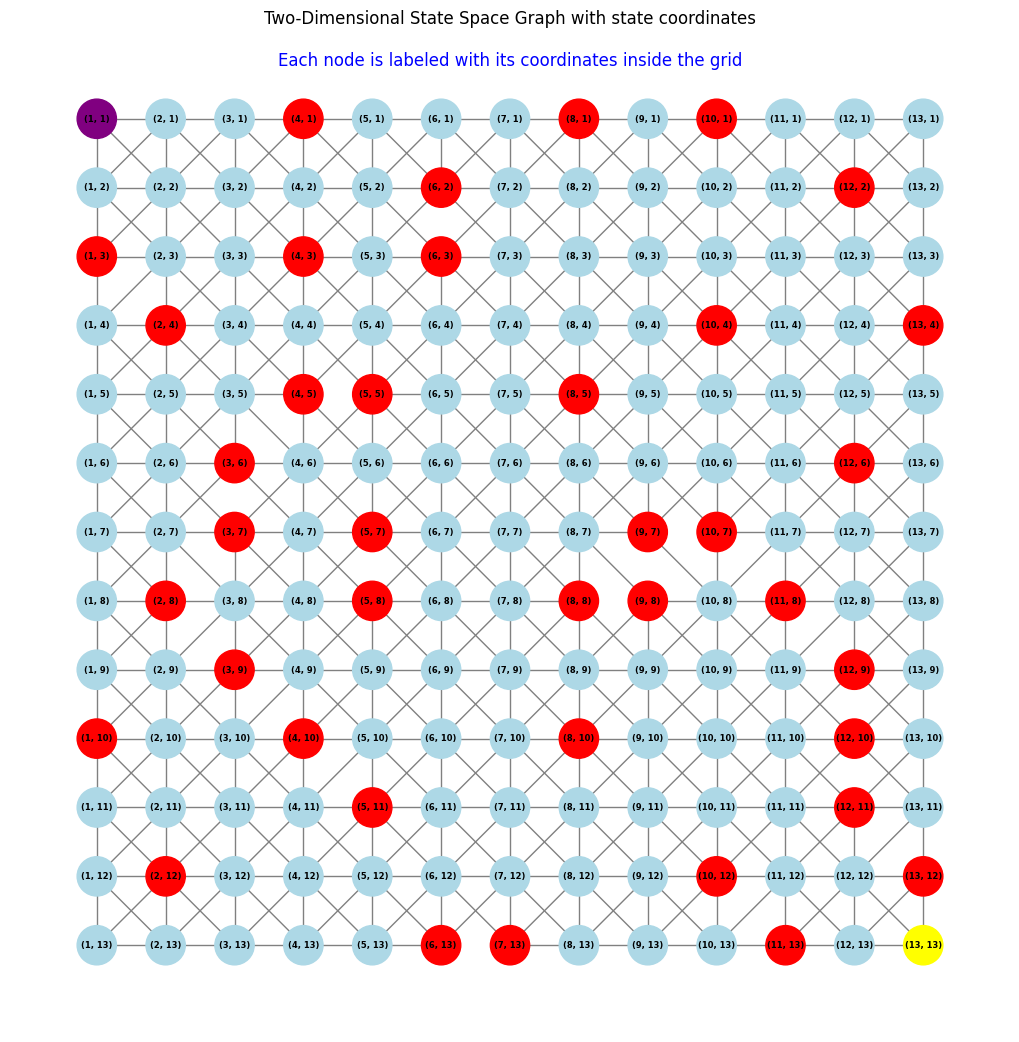

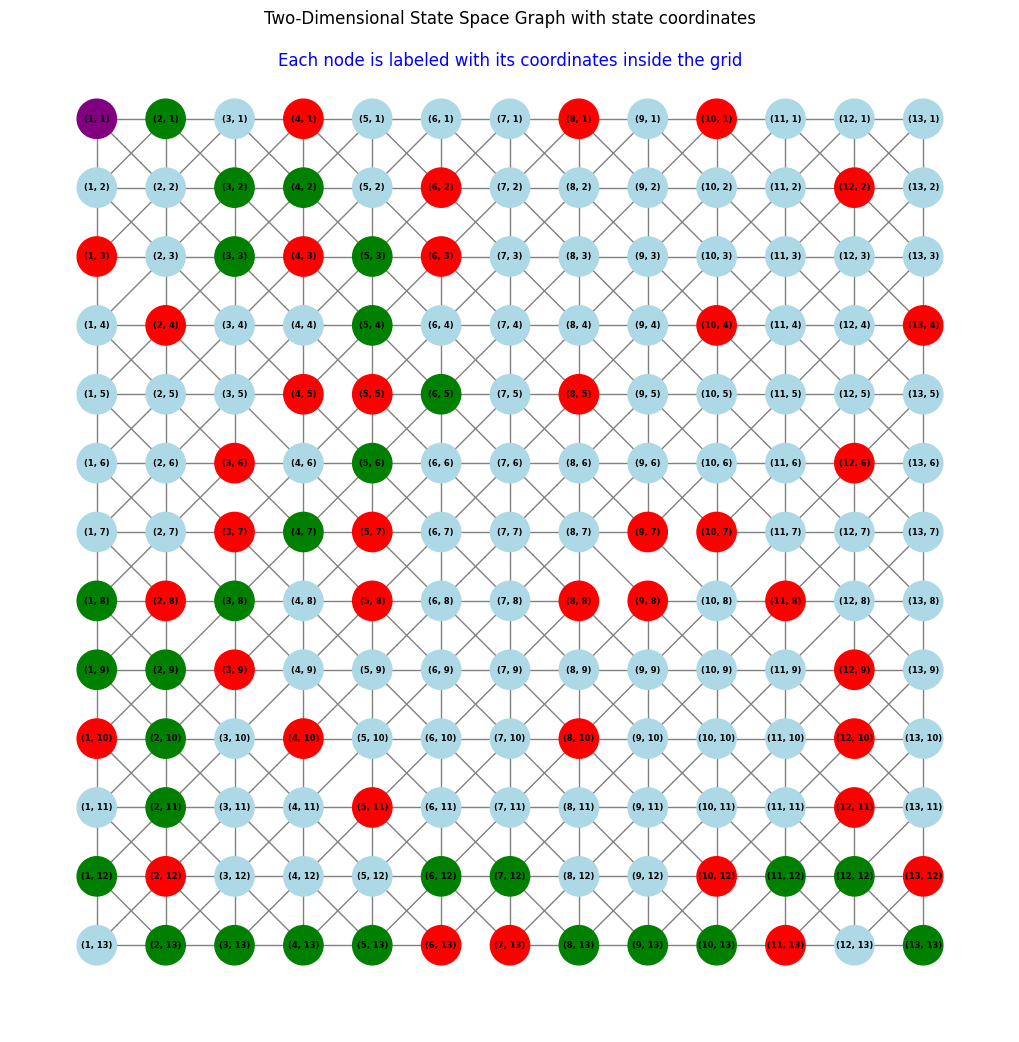

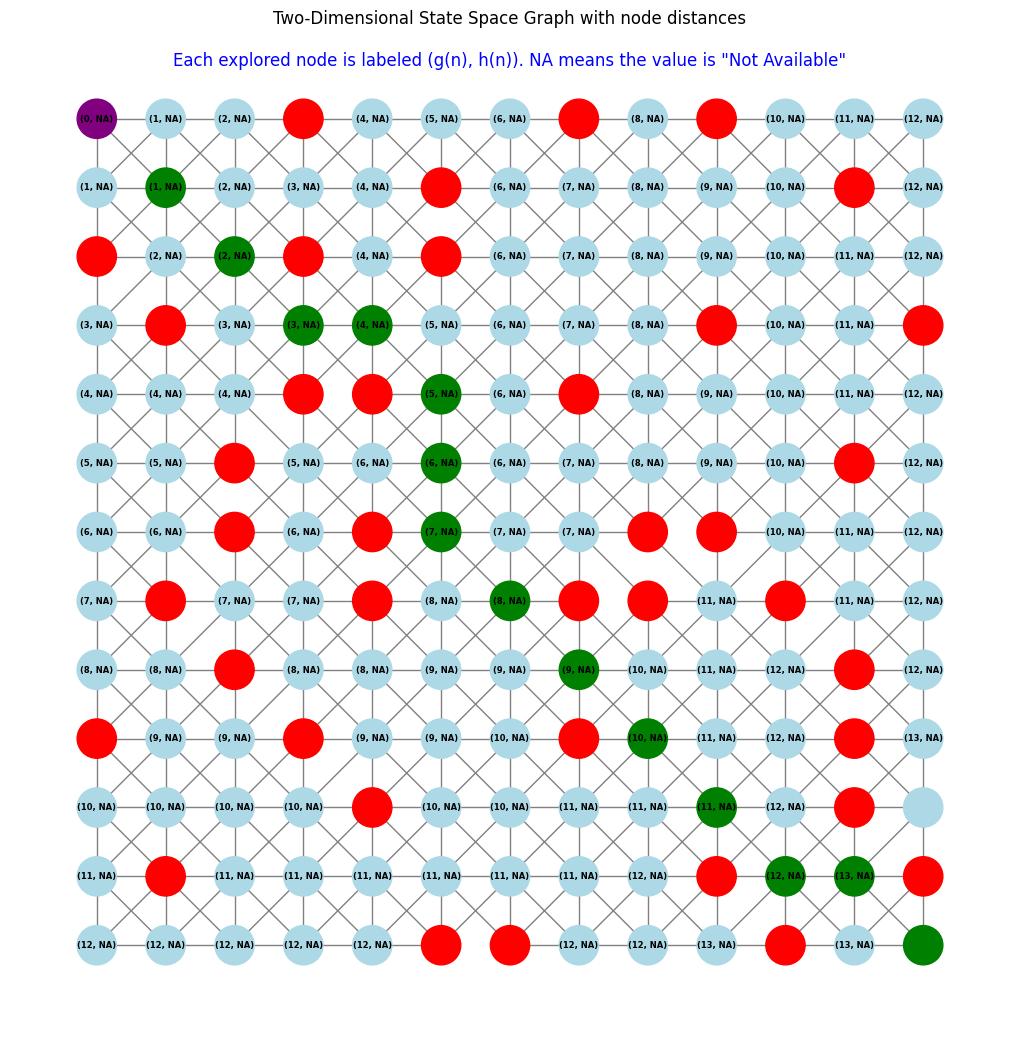

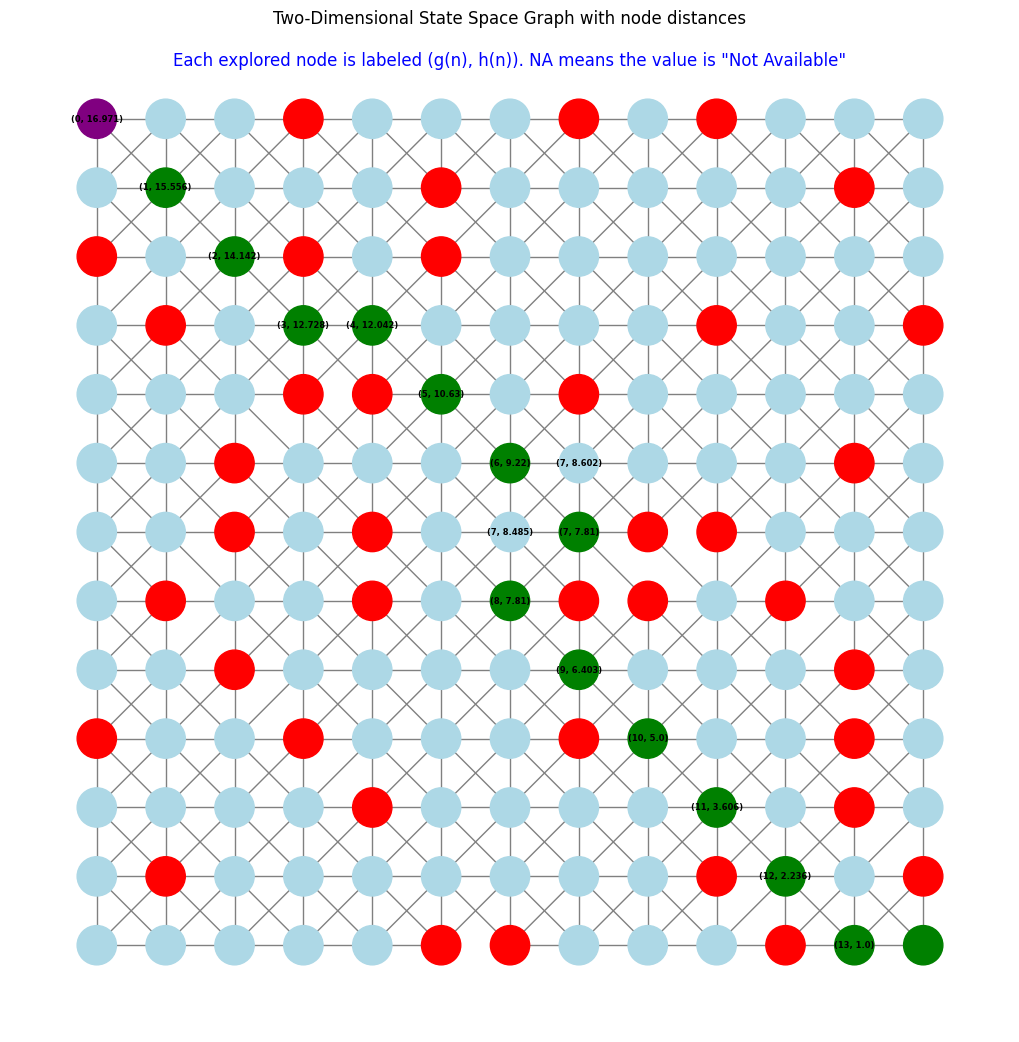

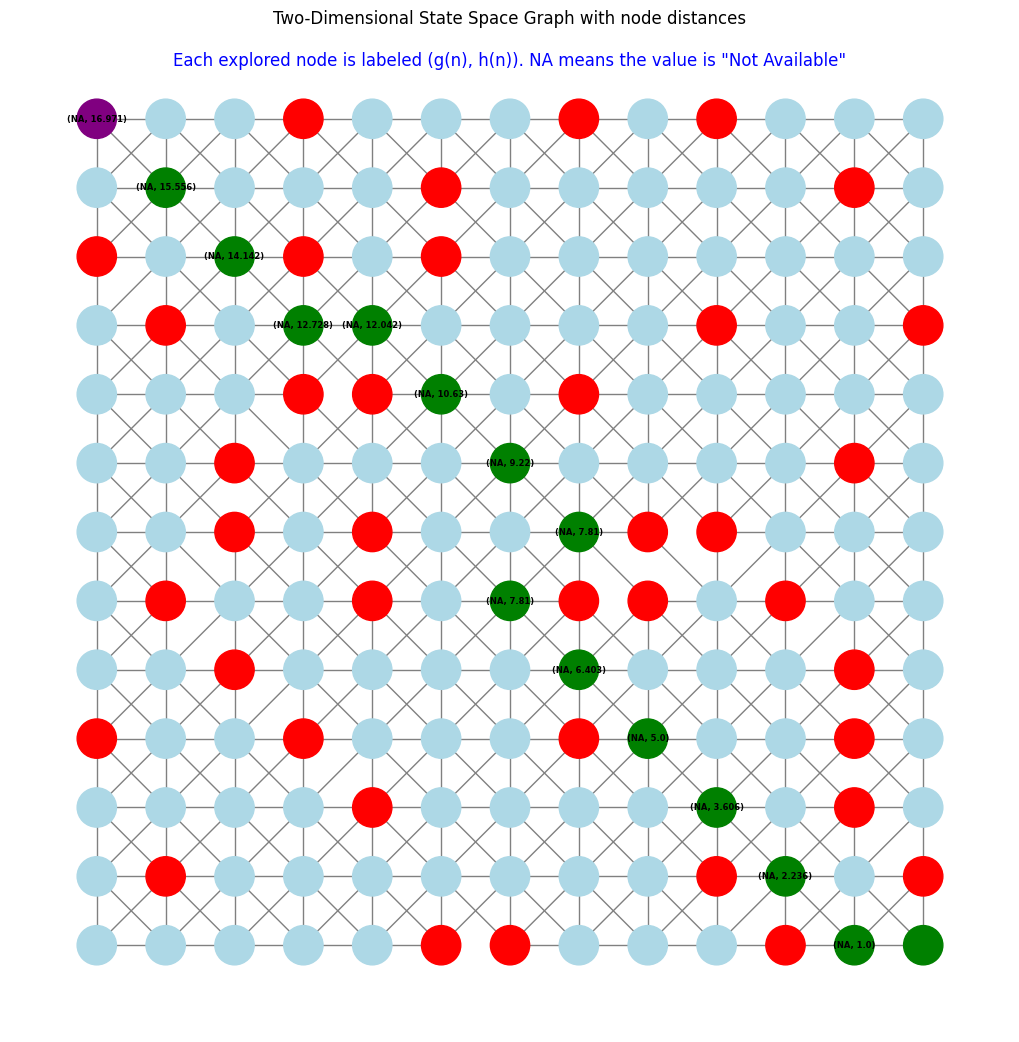

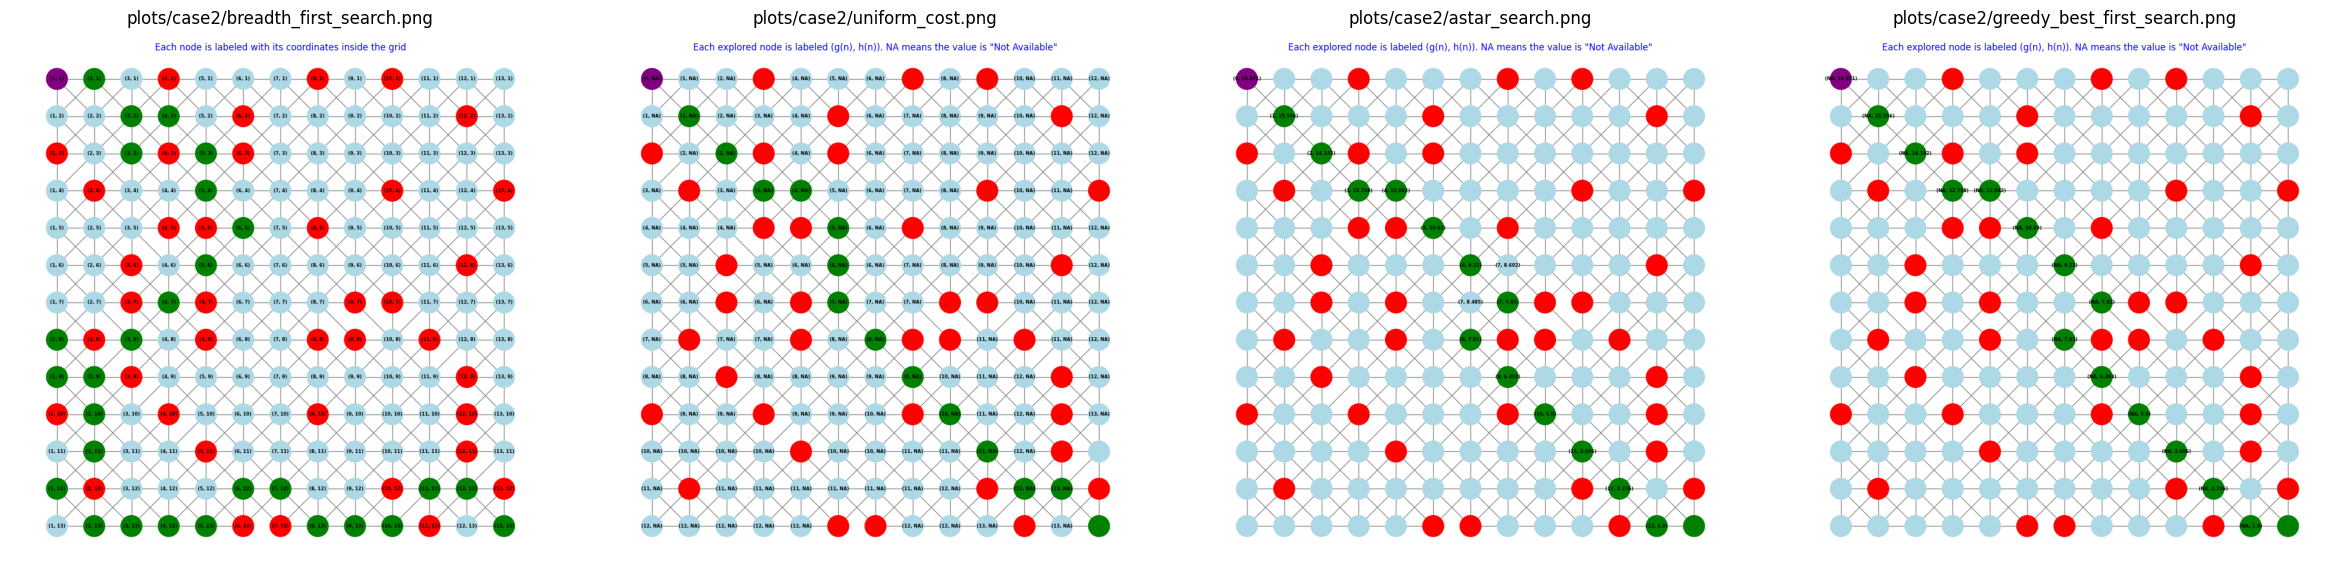

In [28]:
%matplotlib inline

plot_paths_level2 = ['plots/case2/breadth_first_search.png',
                    'plots/case2/uniform_cost.png',
                    'plots/case2/astar_search.png',
                    'plots/case2/greedy_best_first_search.png']

display_saved_plots(plot_paths_level2)

## <u> LEVEL 3 </u>


In [29]:
# Creating the environment
env_lv3 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv3,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv3.seed(42)
obs_lv3 = env_lv3.reset() #each reset generates a new environment instance
env_lv3.render()

# Game map
plt.imshow(obs_lv3['pixel'][45:290, 0:250]) #Plots directly from minihack generator
game_map_lv3 = process_matrix(obs_lv3['chars'])
game_map_lv3_colors = process_matrix(obs_lv3['colors'])


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

### General Problem

In [30]:
# Instantiate a problem from class GridWorldProblem
grid_problem3 = GridWorldProblem(game_map_lv3, find_state_coord(game_map_lv3, ord('@')), find_state_coord(game_map_lv3, ord('>')), game_map_lv3_colors)

print("Initial state:", grid_problem3.initial_state)
print("Goal state:", grid_problem3.goal_state)

basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)

plot_graph(basic_graph, "plots/case3/case3.png")

Initial state: (1, 1)
Goal state: (13, 13)


## Uninformed Agent 

In [31]:
# Instantiate an Uninformed Search Agent for level 3
uninformed_agent = UninformedSearchAgent(grid_problem3)

### Breadth-First Search

In [32]:
# Perform uniformed search with the Breadth-First Search
solution_path = uninformed_agent.search(breadth_first_search)

# Record the results
time_level3.append(uninformed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph
plot_graph(explored_graph, "plots/case3/breadth_first_search.png")

Time: 0.003779 seconds
The found path is long 28.
The cost of the taken path is 36.


### Uninform Cost Search

In [33]:
# Use the Uniform Cost Search
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

# Record the results
time_level3.append(uninformed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The taken path has the length {len(solution_path)} (steps).')

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph
plot_graph_distances(explored_graph, node_distances, "plots/case3/uniform_cost.png")

Time: 0.012341 seconds
The taken path has the length 14 (steps).
The cost of the taken path is 14.


## Informed Agent

In [34]:
# Instantiate an Informed Search Agent
informed_agent = InformedSearchAgent(grid_problem3)

###  A*

In [35]:
# Use A* 
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

# Record the results
time_level3.append(informed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph_distances(explored_graph, node_distances, "plots/case3/astar_search.png")

Time: 0.001891 seconds
The found path is long 14
The cost of the taken path is 14.


### Greedy Best-First-Search

In [36]:
# Use Greedy Best First Search
informed_agent = InformedSearchAgent(grid_problem3)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

# Record the results
time_level3.append(informed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph_distances(explored_graph, node_distances, "plots/case3/greedy_best_first_search.png")

Time: 0.00069 seconds
The found path is long 14
The cost of the taken path is 14.


In [37]:
comparison_level3.append(algorithms)
comparison_level3.append(time_level3)
comparison_level3.append(path_level3)
comparison_level3.append(path_cost_level3)
df_level3 = pd.DataFrame()
df_level3['Algorithm'] = algorithms
df_level3['Execution Time'] = time_level3
df_level3['Path Length'] = path_level3
df_level3['Path Cost'] = path_cost_level3
df_level3.set_index('Algorithm', inplace=True)
df_level3

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.003779           28         36
Uniform Cost Search (UA)             0.012341           14         14
A* (IA)                              0.001891           14         14
Greedy Best First Search (IA)        0.000690           14         14

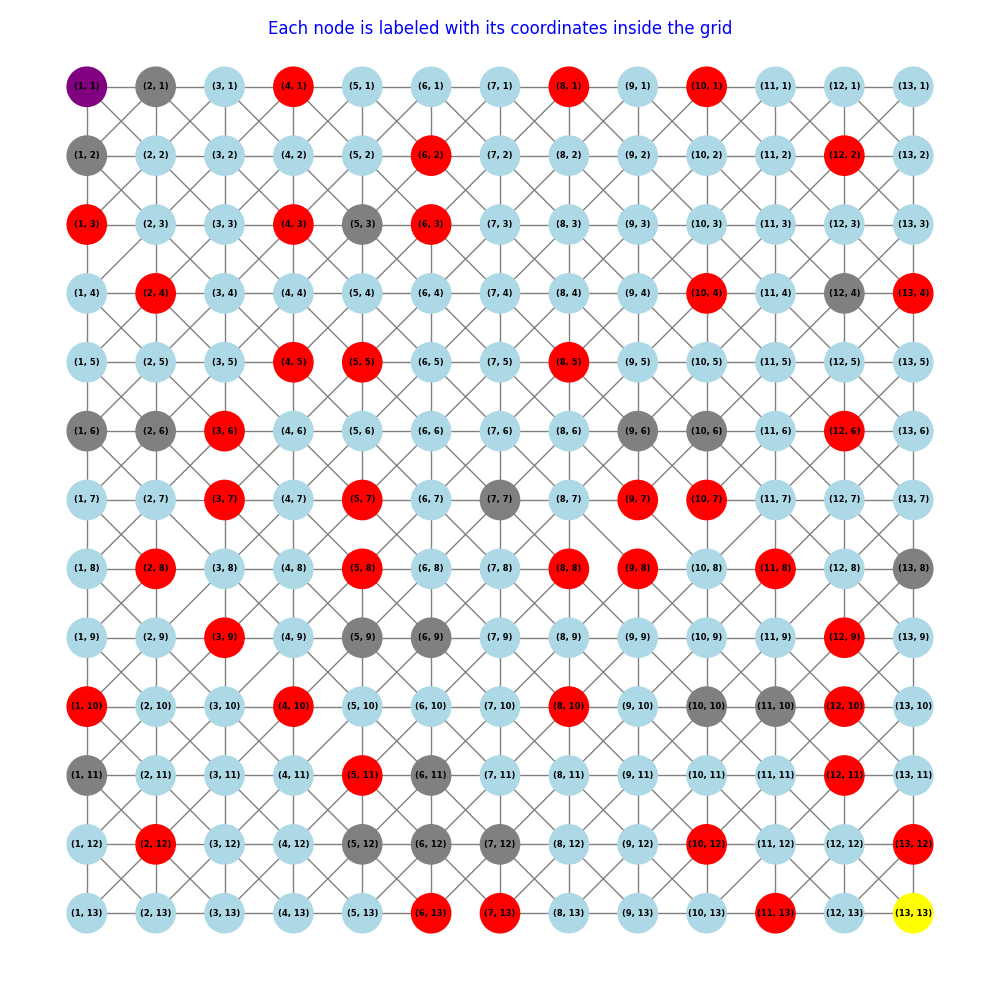

In [38]:
Image(filename='plots/case3/case3.png', width=500, height=500)

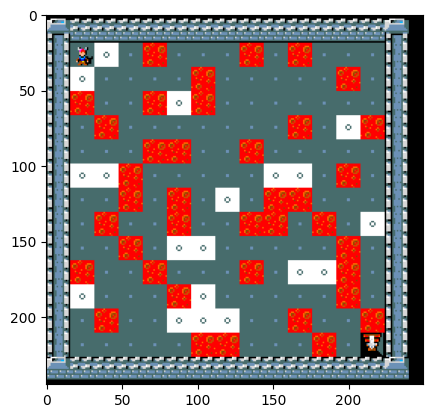

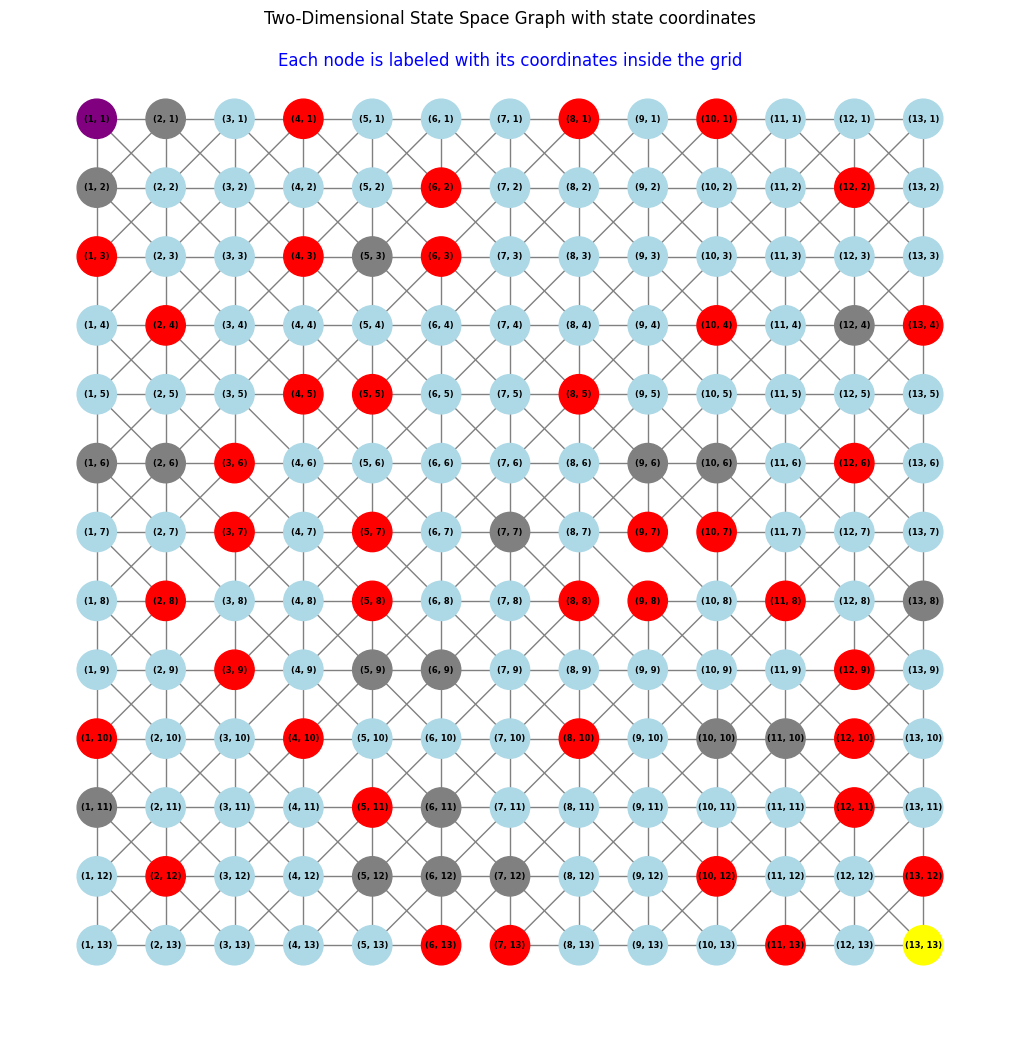

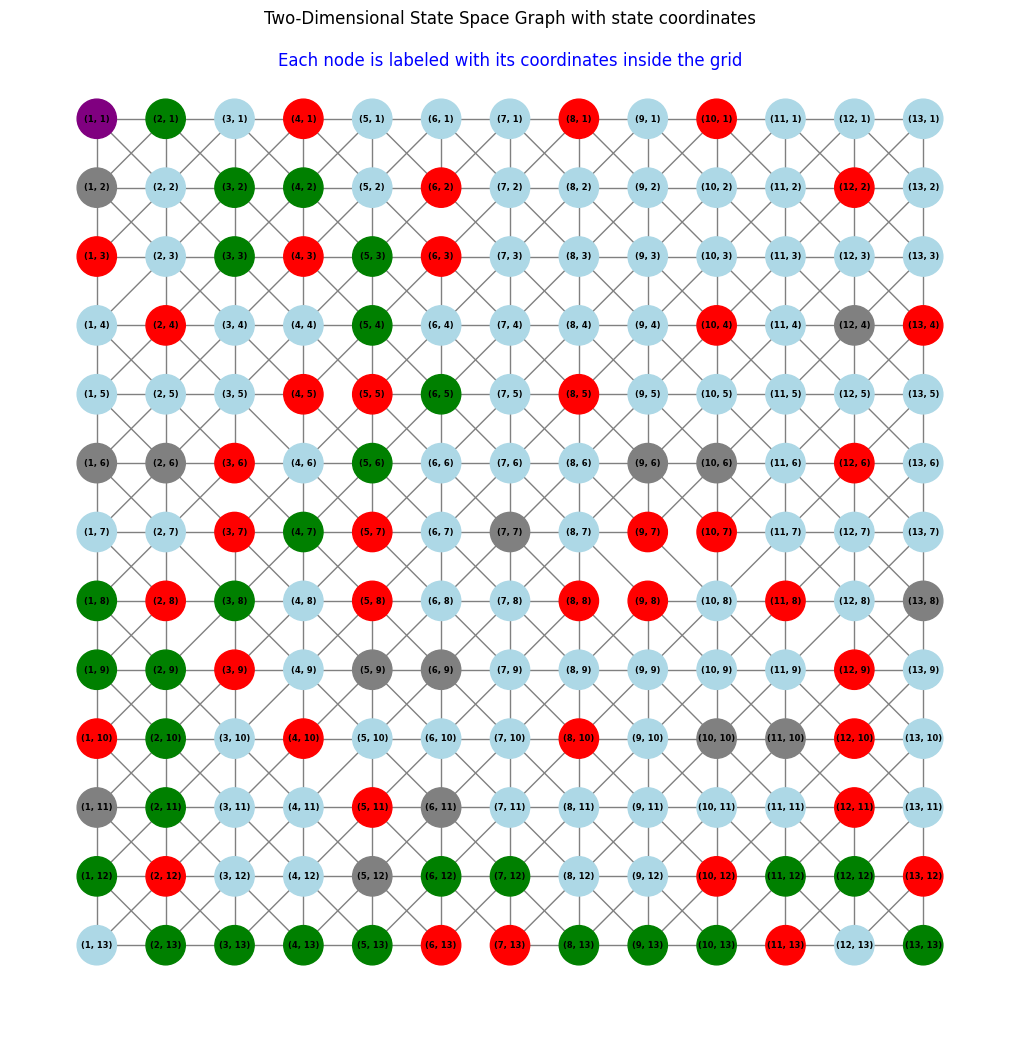

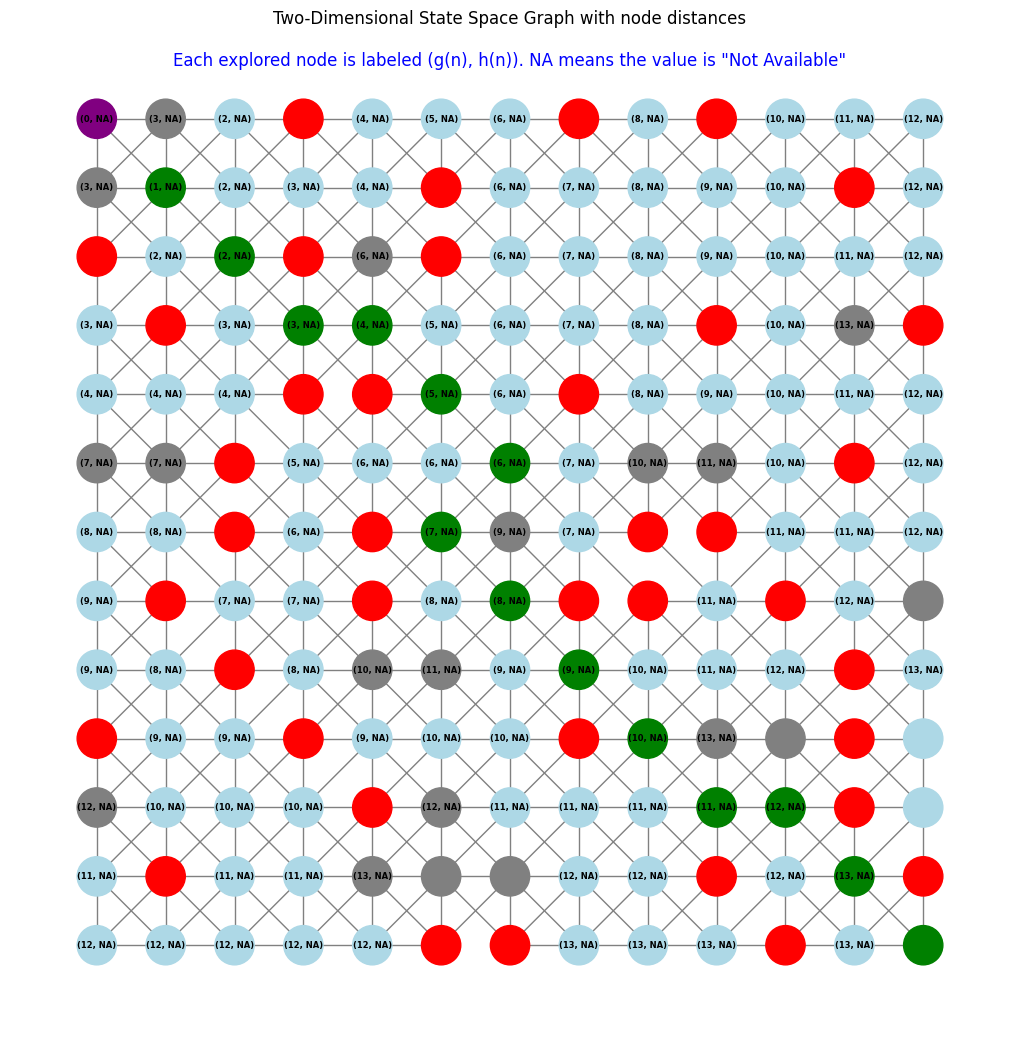

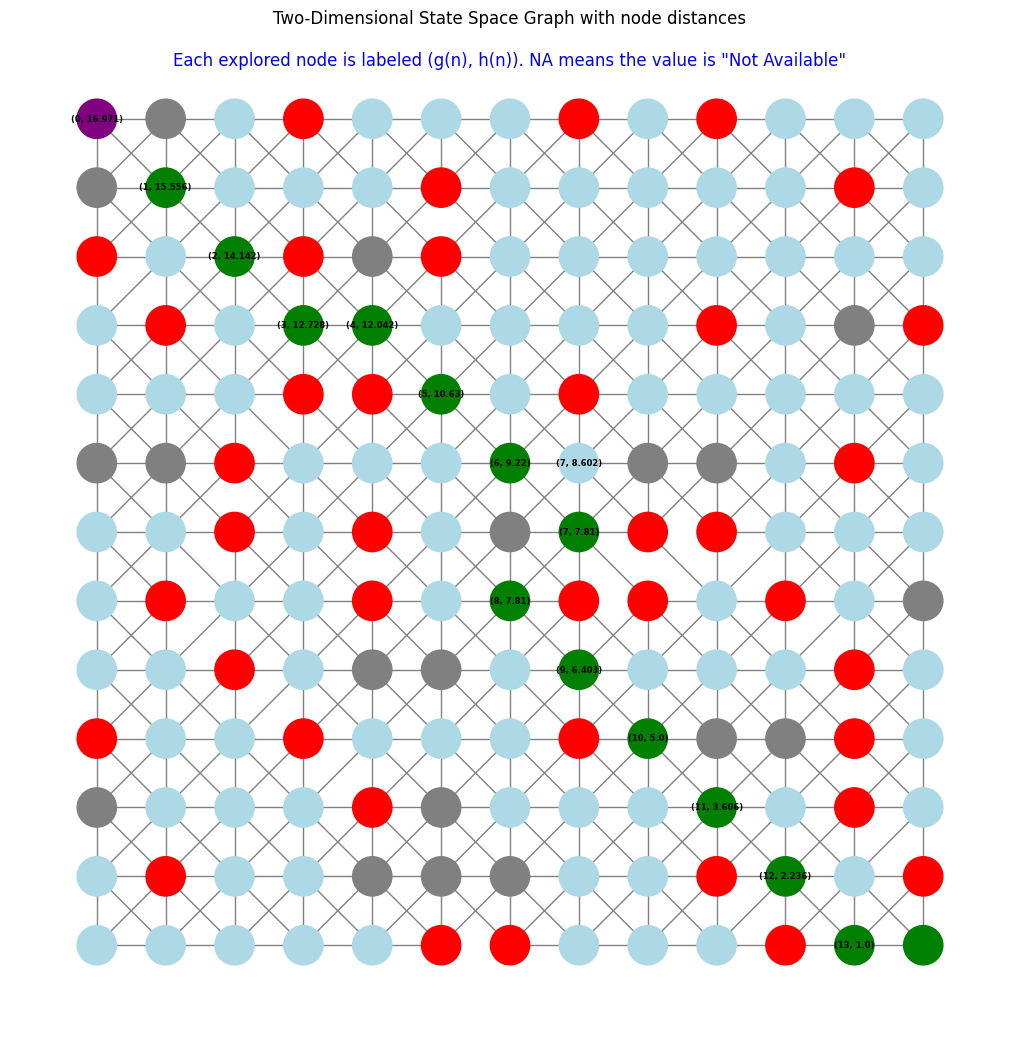

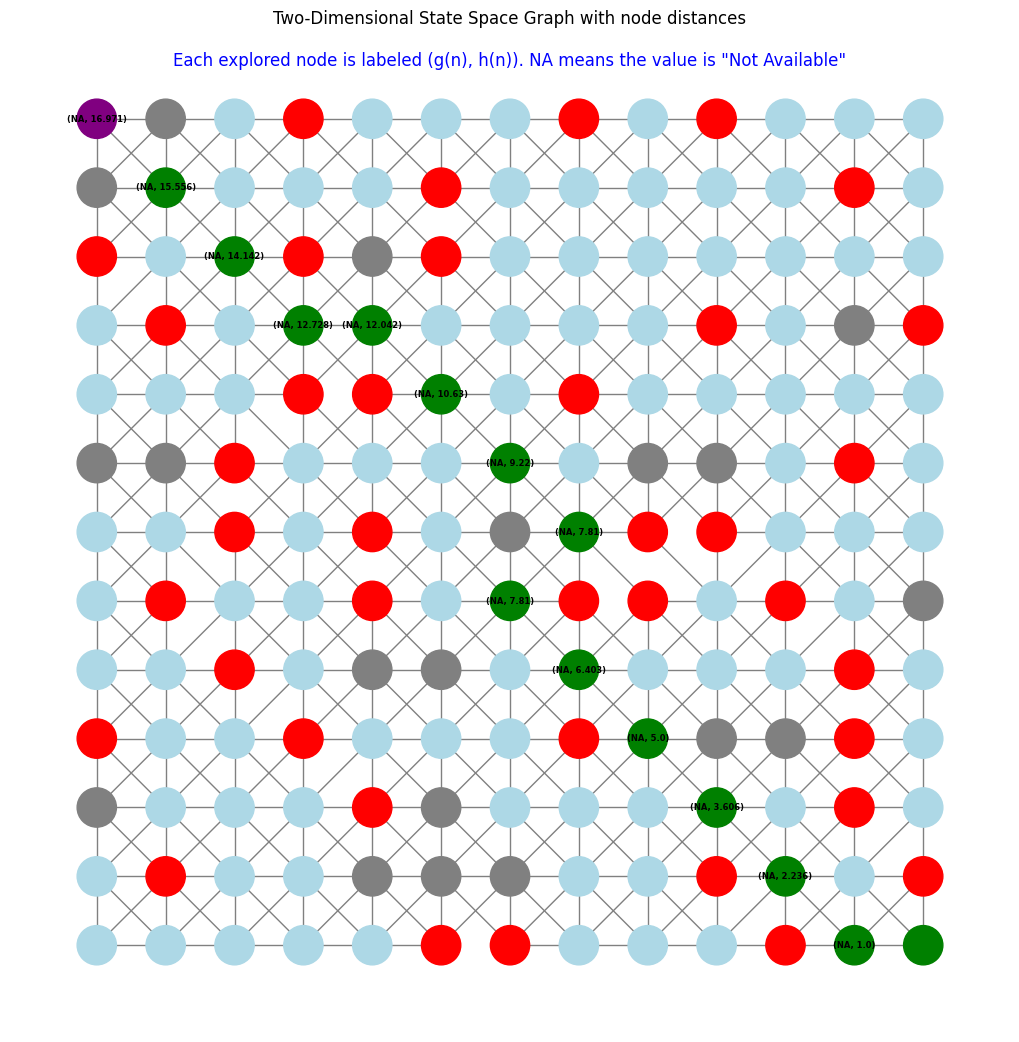

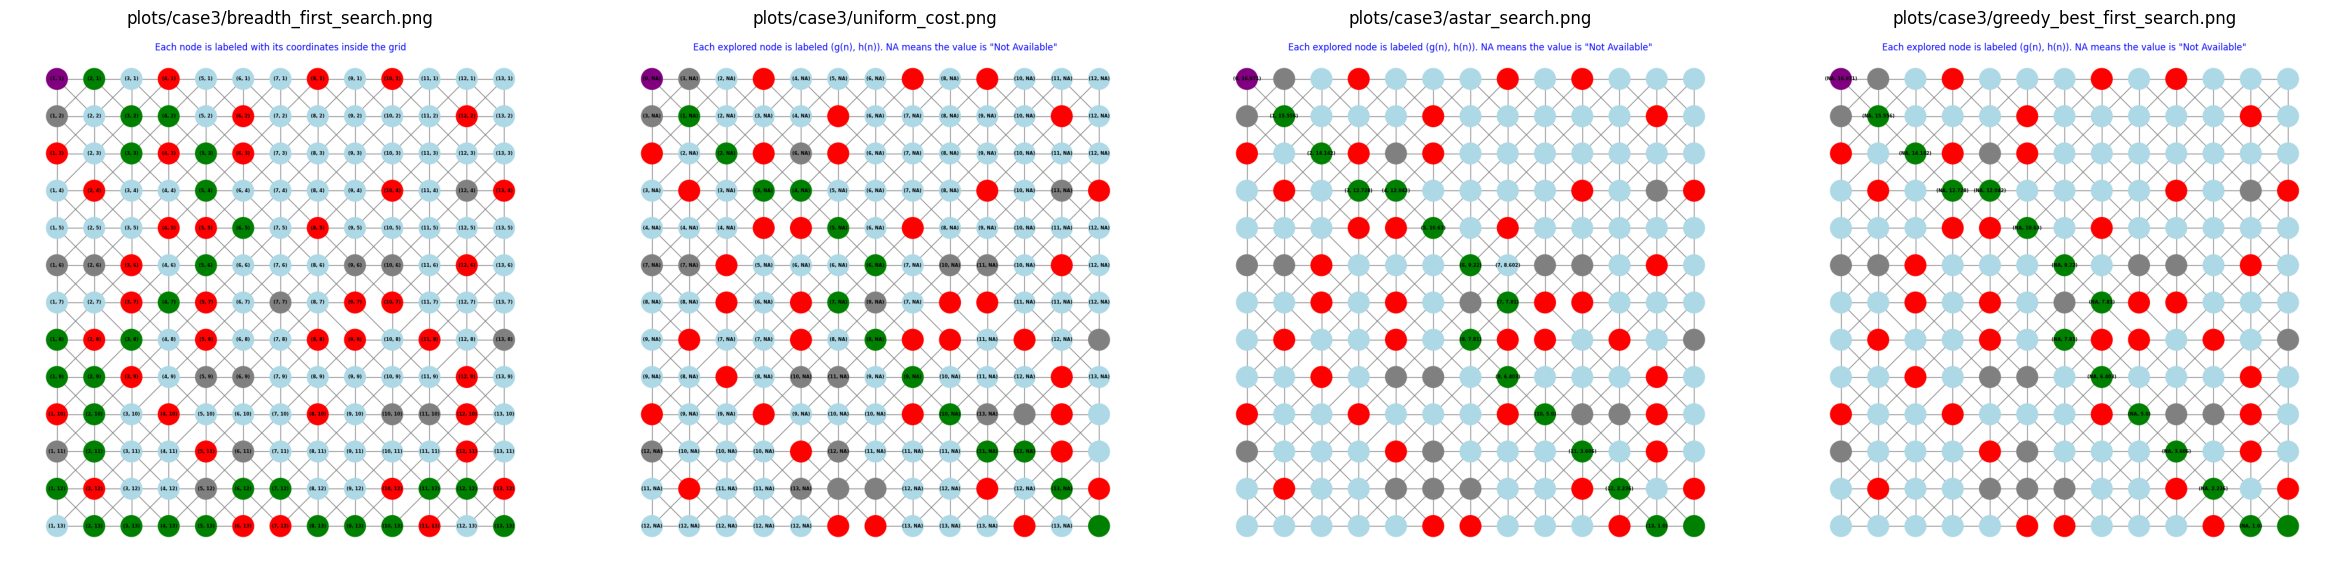

In [39]:
%matplotlib inline

plot_paths_level3 = ['plots/case3/breadth_first_search.png',
                    'plots/case3/uniform_cost.png',
                    'plots/case3/astar_search.png',
                    'plots/case3/greedy_best_first_search.png']

display_saved_plots(plot_paths_level3)

## Summary of the three levels
... results in static environment

In [40]:
print("Level 1:")
print(df_level1)
print("\nLevel 2:")
print(df_level2)
print("\nLevel 3:")
print(df_level3)

Level 1:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.009726           29         29
Uniform Cost Search (UA)             0.014542           13         13
A* (IA)                              0.001660           13         13
Greedy Best First Search (IA)        0.001004           13         13

Level 2:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.007107           28         28
Uniform Cost Search (UA)             0.011010           14         14
A* (IA)                              0.002417           14         14
Greedy Best First Search (IA)        0.003249           14         14

Level 3:
                               Execution Time  Path Length  Path Cost
Algorithm                                                    

In [41]:
# %matplotlib inline
# print(df_case1)
# display_saved_plots(plot_paths_case1)
# print(df_case2)
# display_saved_plots(plot_paths_case2)
# print(df_case3)
# display_saved_plots(plot_paths_case3)

In [42]:
plt.ion() #??????????????

## <u> LEVEL 4 </u>: we added a hostile monster!
change the env into a dynamic one and using 2 different types of monsters,
explaining the monsters, 
use 2 different heuristic,
create 2 online search algorithms (A* and Greedy) 

### <u> LEVEL 4.1 </u>: Rat


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}..r.....}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

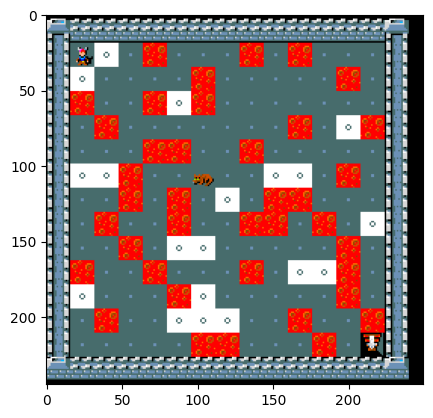

In [43]:
# Create the environment
env_lv4_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance
env_lv4_1.render()

plt.imshow(obs_lv4_1['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

### General Problem

In [44]:
# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

print("Initial state:", grid_problem4_1.initial_state)
print("Goal state:", grid_problem4_1.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem4_1, grid_problem4_1.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


## Informed Agents for Online Search 
### Online A* - Euclidean Distance

In [45]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'euclidean')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 17, Path cost: 17


### Online A* - Diagonal Distance

In [46]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [47]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'diagonal')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 25, Path cost: 25


### Online Greedy Best-First Search - Euclidean Distance

In [48]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [49]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'greedy', 'euclidean')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


### Online Greedy Best-First Search - Diagonal Distance

In [50]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [51]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'greedy', 'diagonal')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 24, Path cost: 28


### <u> CASE 4.2 </u>: The monster is a Giant Beetle!
#### 


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}..a.....}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

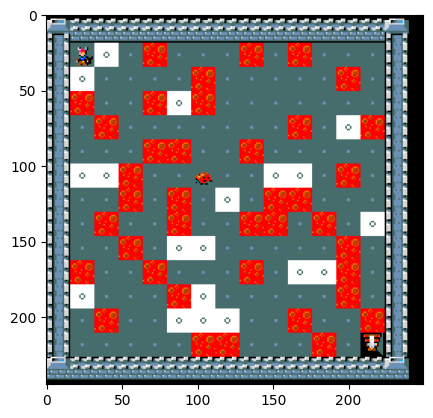

In [52]:
env_lv4_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance
env_lv4_2.render()

plt.imshow(obs_lv4_2['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

In [53]:
# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

print("Initial state:", grid_problem4_2.initial_state)
print("Goal state:", grid_problem4_2.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem4_2, grid_problem4_2.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


## Informed Agents for Online Search 
### Online A* - Euclidean Distance

In [54]:
### Informed Agent for Online Search (online A*)
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'euclidean')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 17, Path cost: 17


###  Online A* - Diagonal Distance

In [55]:
# Online Search 
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [56]:
### Informed Agent for Online Search (online A*)
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'diagonal')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 20, Path cost: 22


### Online Greedy Best-First Search - Euclidean Distance

In [57]:
# Online Search 
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [58]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'greedy', 'euclidean')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


### Online Greedy Best-First Search - Diagonal Distance

In [59]:
# Online Search with Greedy Algorithm
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [60]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'greedy', 'diagonal')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


## <u> CASE 5 </u>
### Create the Environment 4.1.: we added a dead end.

### <u> CASE 5.1 </u>: Rat - A* - Euclidean Distance




Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}..}..|                                                                 
|..}..r...}.}.|                                                                 
|..}.}...}}.}.|                                                                 
|.}..}..}}.}}.|            

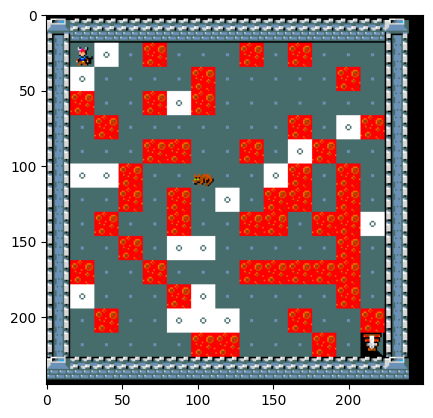

In [61]:
env_lv5_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_1.seed(42)
obs_lv5_1 = env_lv5_1.reset() #each reset generates a new environment instance
env_lv5_1.render()

plt.imshow(obs_lv5_1['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv5_1 = process_matrix(obs_lv5_1['chars'])
game_map_lv5_1_colors = process_matrix(obs_lv5_1['colors'])
game_lv5_1 = obs_lv5_1['pixel']

In [62]:
# Instantiate a problem from class GridWorldProblem
grid_problem5_1 = GridWorldProblem(game_map_lv5_1, find_state_coord(game_map_lv5_1, ord('@')), find_state_coord(game_map_lv5_1, ord('>')), game_map_lv5_1_colors)

print("Initial state:", grid_problem5_1.initial_state)
print("Goal state:", grid_problem5_1.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem5_1, grid_problem5_1.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


In [63]:
onlineSearchAgent = OnlineSearchAgent(grid_problem5_1)

image = plt.imshow(game_lv5_1[25:300, :250])
agent = find_state_coord(grid_problem5_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem5_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'euclidean')

    grid, _, _, _ = env_lv5_1.step(action) # Agent takes next step
    new_game_map_lv5_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem5_1.update_grid(new_game_map_lv5_1) # Update grid
    agent = find_state_coord(grid_problem5_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem5_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv5_1, game_map_lv5_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 20, Path cost: 20


### <u> CASE 5.2 </u>: Beetle - A* - Euclidean Distance


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}..}..|                                                                 
|..}..a...}.}.|                                                                 
|..}.}...}}.}.|                                                                 
|.}..}..}}.}}.|            

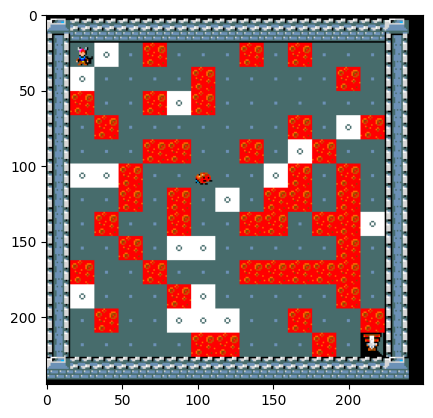

In [64]:
env_lv5_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_2.seed(42)
obs_lv5_2 = env_lv5_2.reset() #each reset generates a new environment instance
env_lv5_2.render()

plt.imshow(obs_lv5_2['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv5_2 = process_matrix(obs_lv5_2['chars'])
game_map_lv5_2_colors = process_matrix(obs_lv5_2['colors'])
game_lv5_2 = obs_lv5_2['pixel']

In [65]:
# Instantiate a problem from class GridWorldProblem
grid_problem5_2 = GridWorldProblem(game_map_lv5_2, find_state_coord(game_map_lv5_2, ord('@')), find_state_coord(game_map_lv5_2, ord('>')), game_map_lv5_2_colors)

print("Initial state:", grid_problem5_2.initial_state)
print("Goal state:", grid_problem5_2.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem5_2, grid_problem5_2.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


In [66]:
### Informed Agent for Online Search (online A*)
onlineSearchAgent = OnlineSearchAgent(grid_problem5_2)

image = plt.imshow(game_lv5_2[25:300, :250])
agent = find_state_coord(grid_problem5_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem5_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'euclidean')

    grid, _, _, _ = env_lv5_2.step(action) # Agent takes next step
    new_game_map_lv5_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem5_2.update_grid(new_game_map_lv5_2) # Update grid
    agent = find_state_coord(grid_problem5_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem5_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv5_2, game_map_lv5_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 29, Path cost: 29


# Final Considerations

come back to the hypothesis

# Teamwork

# Bib
Book
